## Index
1. Libraries
2. Data Sets
3. Data Cleaning
4. Data Prep for Regression Analysis
5. Regression Analysis
6. Insights

## 01 Libraries

In [3]:
# importing visualization and analytical libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## 02 Data Sets

In [5]:
# creating path for data import

path=r'/Users/konstant/Documents/Achievement 6 - Advanced Analytics and Dashboard design'

In [6]:
# Importing prepared data set

df_prepared= pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'global_food_wastage_prepared.csv'), index_col = False)

In [7]:
df_prepared.head()

,Unnamed: 0,Country,Year,Food Category,Total Waste (Tons),Economic Loss (Million $),Avg Waste per Capita (Kg),Population (Million),Household Waste (%)
0,0,Argentina,2018,Bakery Items,72290.69,71749.94,60.3725,528.2025,59.035000
1,1,Argentina,2018,Beverages,127249.21,128791.57,131.8000,525.7825,37.177500
2,2,Argentina,2018,Dairy Products,28971.41,25935.06,94.5000,680.0200,54.286667
3,3,Argentina,2018,Frozen Food,78925.33,87757.40,123.7800,991.5350,62.292500
4,4,Argentina,2018,Grains & Cereals,152731.27,156398.00,122.7050,676.5950,53.573333


## 03 Data Cleaning

In [9]:
# Dropping Unnamed column 
df_prepared=df_prepared.drop(columns=['Unnamed: 0'])

In [10]:
df_prepared.columns.tolist()

['Country',
 'Year',
 'Food Category',
 'Total Waste (Tons)',
 'Economic Loss (Million $)',
 'Avg Waste per Capita (Kg)',
 'Population (Million)',
 'Household Waste (%)']

In [11]:
# Check for missing values

df_prepared.isnull().sum()

# No missing values to handle

Country                      0
Year                         0
Food Category                0
Total Waste (Tons)           0
Economic Loss (Million $)    0
Avg Waste per Capita (Kg)    0
Population (Million)         0
Household Waste (%)          0
dtype: int64

In [12]:
# Checkign for duplicates

dups = df_prepared.duplicated()

#no output = no duplicates

# Hypotheses
## Food wastage varies significantly across time, countries, income levels, population sizes, and food categories.


## 04 Data Preperation for Regression Analysis

In [14]:
# Comparing the follwoing 2 variables: 
#1) Total Waste (Tons) --> Dependant Variable (y) 
#2) Economic Loss (Million $) --> Indipendant Variable (X)

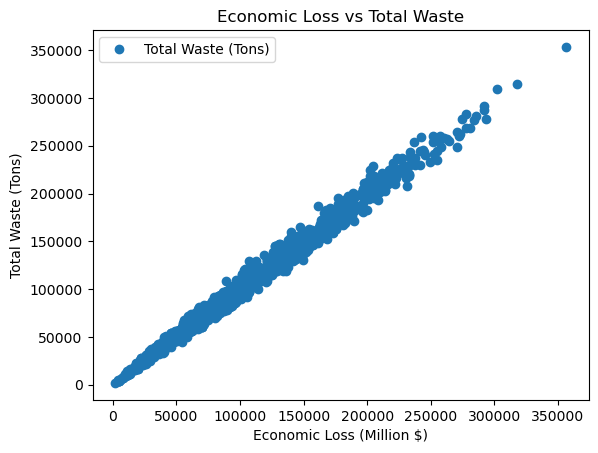

In [15]:
# Firstly creating a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_prepared.plot(x = 'Economic Loss (Million $)', y='Total Waste (Tons)',style='o') 
plt.title('Economic Loss vs Total Waste')  
plt.xlabel('Economic Loss (Million $)')  
plt.ylabel('Total Waste (Tons)')  
plt.show()

In [16]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_prepared['Economic Loss (Million $)'].values.reshape(-1,1)
y = df_prepared['Total Waste (Tons)'].values.reshape(-1,1)

In [17]:
X

array([[ 71749.94],
       [128791.57],
       [ 25935.06],
       ...,
       [116208.37],
       [104870.59],
       [ 83417.86]])

In [18]:
y

array([[ 72290.69],
       [127249.21],
       [ 28971.41],
       ...,
       [118512.41],
       [103268.  ],
       [ 87834.23]])

In [19]:
# Split data into a training set and a test set with a 30/70 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 05 Regression Analysis

In [21]:
# Now creating a regression object.

regression = LinearRegression()

In [22]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [23]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

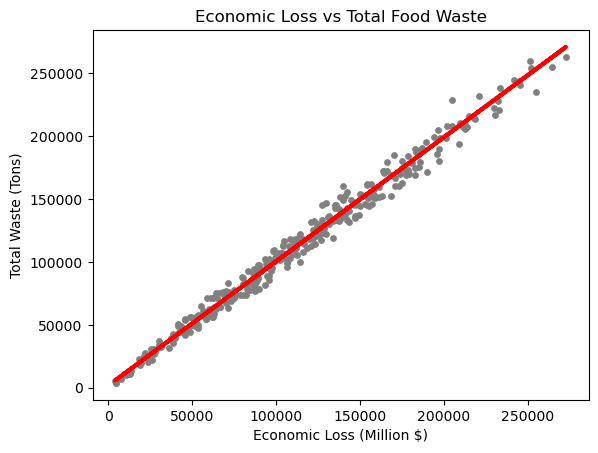

In [24]:
# Creating a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Economic Loss vs Total Food Waste')
plot_test.xlabel('Economic Loss (Million $)')
plot_test.ylabel('Total Waste (Tons)')
plot_test.show()

### Finding 
- The linear modal represented by the red regression line covers all the data points quite well in that they are very close to the line itself.
- This indicates a positive relationship between the two variables: Waste and Economic Loss, as the waste goes up, so does the economic loss.
- Overall the regression line fits the data very well indicating high model accuracy

In [26]:
# Creating objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted)

In [27]:
# Printing the model summary statistics to evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.98691471]]
Mean squared error:  44653150.08909036
R2 score:  0.9863598255820105


In [28]:
# Now creating a list of the predicted y array 

y_predicted

array([[157607.56613311],
       [ 37372.12143343],
       [188851.01610586],
       [127064.93416863],
       [ 42865.28873707],
       [112590.97125749],
       [100132.8408666 ],
       [ 90810.35564648],
       [177695.88947489],
       [249850.30989402],
       [ 86739.12519506],
       [ 89494.6305559 ],
       [ 89032.6952544 ],
       [112513.85374166],
       [ 23486.7939349 ],
       [149870.43110371],
       [213875.86711372],
       [105114.74687129],
       [ 45239.30221483],
       [105340.52335064],
       [243763.27652978],
       [170509.2554735 ],
       [ 84801.58461915],
       [108165.211433  ],
       [151025.38778722],
       [156674.03363506],
       [ 14565.33164007],
       [270769.09236101],
       [194876.2390015 ],
       [ 56009.73935905],
       [131717.00340641],
       [ 64196.45351772],
       [200841.11206231],
       [ 67602.87847884],
       [ 62828.9154046 ],
       [172725.50076493],
       [ 84095.15106616],
       [ 52571.13110908],
       [1183

In [29]:
# Comparing the predicted y values with the actual y values in a dataframe.

data_y_predicted = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data_y_predicted.head(30)

,Actual,Predicted
0,151871.76,157607.566133
1,31901.94,37372.121433
2,171520.96,188851.016106
3,117773.45,127064.934169
4,49420.30,42865.288737
5,117435.53,112590.971257
6,106389.60,100132.840867
7,94477.50,90810.355646
8,184402.35,177695.889475
9,259822.57,249850.309894


### Model Summary Statistic Findings
- Slope: here we have a positive slope of 0.98 indicating that there is a strong positive relationship between the two variables (as ecenomic loss rises, so does total waste)
- Mean squared error: here we have a value of 44653150. This indicates the modesl accurcy or how close the the regression line is to the set of points. This quite a large number, given the size of the data set the MSE could mean that the regression line is not an accurate representation of the data set. But this nees to be confirmed as the other 2 summary statistics show a very good fit. 
- R2 score: Explians the variance in the model. Here we have a score of 0.98, which is very close to 1 and indicating a very good fit. 

### Possible Bias
- Selection Bias: since some countries data are missing and the countries included are mostly high-income or low-income, the model may not generalize well to the missing group.
- Reporting/Measurement Bias: Countries with better measurement tools may report more accurately
